# Dog Breed Image Classification using AWS SageMaker

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

In this project, AWS Sagemaker was used to finetune a pretrained model that can perform image classification. Sagemaker profiling, debugger, hyperparameter tuning and other good ML engineering practices were used.

The dog breed classification dataset [1] was used. It contains images from 133 dog breeds divided into training, testing and validation datasets [4].

The resnet50 model [2] was used because it has the best accuracy and speed, and a small model size when compared to other models [3] as shown in the figure below from [3].


![Pre-Trained-Model-Comparison.png](../../project/images/Pre-Trained-Model-Comparison.png) 


**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [3]:
!pip install torch

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached torch-1.10.1-cp37-cp37m-manylinux1_x86_64.whl (881.9 MB)


In [4]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
import os
from sagemaker.pytorch import PyTorch
from sagemaker.session import Session
from sagemaker import get_execution_role

In [5]:
import torch
print(torch.__version__)

1.10.1+cu102


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

The dog breed classification dataset [1] was used. It contains images from 133 dog breeds divided into training, testing and validation datasets [4].

In [6]:
#TODO: Fetch and upload the data to AWS S3

session = sagemaker.Session()

bucket= session.default_bucket()
print("Default Bucket: {}".format(bucket))

prefix = "dogImages"

region = session.boto_region_name
print("AWS Region: {}".format(region))

role = get_execution_role()
print("RoleArn: {}".format(role))

#make sure u get a new bucket

Default Bucket: sagemaker-us-east-1-288619721928
AWS Region: us-east-1
RoleArn: arn:aws:iam::288619721928:role/service-role/AmazonSageMaker-ExecutionRole-20211208T115481


In [7]:
# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2022-01-03 02:59:59--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.113.112
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.113.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  48.8MB/s    in 26s     

2022-01-03 03:00:34 (41.1 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.

In [8]:
# Upload data to S3 bucket.
os.environ["DEFAULT_S3_BUCKET"] = bucket
!aws s3 sync ./dogImages s3://${DEFAULT_S3_BUCKET}/dogImages/

upload: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg to s3://sagemaker-us-east-1-288619721928/dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg to s3://sagemaker-us-east-1-288619721928/dogImages/test/001.Affenpinscher/Affenpinscher_00048.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg to s3://sagemaker-us-east-1-288619721928/dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg to s3://sagemaker-us-east-1-288619721928/dogImages/test/001.Affenpinscher/Affenpinscher_00078.jpg
upload: dogImages/test/002.Afghan_hound/Afghan_hound_00139.jpg to s3://sagemaker-us-east-1-288619721928/dogImages/test/002.Afghan_hound/Afghan_hound_00139.jpg
upload: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg to s3://sagemaker-us-east-1-288619721928/dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg
upload: dogImages/test/002

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

The batch size and learning rate hyperparameters of the resnet50 pretrained model were tuned. The hyperparameters ranges chosen are widely used in tuning.   

In [10]:
#TODO: Declare your HP ranges, metrics etc.

from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

hyperparameter_ranges = {
    "lr": ContinuousParameter(0.001, 0.1),
    "batch_size": CategoricalParameter([32, 64, 128, 256]),
} 

objective_metric_name = "Test Loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "Test Loss", "Regex": "Testing Loss: ([0-9\\.]+)"}]

In [11]:
#TODO: Create estimators for your HPs

from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py3',
    framework_version="1.4.0",
    instance_count=1,
    instance_type="ml.g4dn.xlarge"
)

In [12]:
tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=4,
    max_parallel_jobs=2,
    objective_type=objective_type,
)

In [13]:
# assigning S3 paths for the training job
data_path = "s3://{}/{}/".format(bucket, "dogImages")
output_path = "s3://{}/{}/".format(bucket, "output")
model_path = "s3://{}/{}/".format(bucket, "model")

os.environ['SM_CHANNEL_TRAIN']= data_path
os.environ['SM_MODEL_DIR']= model_path
os.environ['SM_OUTPUT_DATA_DIR']= output_path

In [14]:
# TODO: Fit your HP Tuner
tuner.fit({"train": data_path}, wait=True) # TODO: Remember to include your data channels

.........................................................................................................................................................................................................................................................................................................................................................................................!


In [7]:
from sagemaker.analytics import HyperparameterTuningJobAnalytics

exp = HyperparameterTuningJobAnalytics(
  hyperparameter_tuning_job_name='pytorch-training-220103-0358')

jobs = exp.dataframe()

jobs.sort_values('FinalObjectiveValue')  #, ascending=0

batch_size        lr                            TrainingJobName  \
2       "64"  0.001493  pytorch-training-220103-0358-002-88c64685   
0       "32"  0.002948  pytorch-training-220103-0358-004-c2389ef1   
3      "128"  0.004181  pytorch-training-220103-0358-001-419a8950   
1       "64"  0.013652  pytorch-training-220103-0358-003-0a60737e   

  TrainingJobStatus  FinalObjectiveValue         TrainingStartTime  \
2         Completed            32.730000 2022-01-03 04:00:47+00:00   
0         Completed            34.849998 2022-01-03 04:22:29+00:00   
3         Completed            75.839996 2022-01-03 04:00:43+00:00   
1         Completed           151.539993 2022-01-03 04:13:09+00:00   

            TrainingEndTime  TrainingElapsedTimeSeconds  
2 2022-01-03 04:18:17+00:00                      1050.0  
0 2022-01-03 04:28:48+00:00                       379.0  
3 2022-01-03 04:08:57+00:00                       494.0  
1 2022-01-03 04:20:44+00:00                       455.0

In [15]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()   

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2022-01-03 04:18:17 Starting - Preparing the instances for training
2022-01-03 04:18:17 Downloading - Downloading input data
2022-01-03 04:18:17 Training - Training image download completed. Training in progress.
2022-01-03 04:18:17 Uploading - Uploading generated training model
2022-01-03 04:18:17 Completed - Training job completed


{'_tuning_objective_metric': '"Test Loss"',
 'batch_size': '"64"',
 'lr': '0.0014931828736580656',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2022-01-03-03-58-14-748"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-03-58-14-748/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [16]:
# TODO: Set up debugging and profiling rules and hooks

from sagemaker.debugger import Rule, ProfilerRule, rule_configs

rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]

In [18]:
from sagemaker.debugger import DebuggerHookConfig, ProfilerConfig, FrameworkProfile, CollectionConfig

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=1)
)


collection_config = CollectionConfig(
    name='CrossEntropyLoss_output_0',
    parameters={
        'include_regex': 'CrossEntropyLoss_output_0'
    }
)

debugger_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "10", "eval.save_interval": "1"}, collection_configs=[collection_config]
)
    
   

In [19]:
# TODO: Create and fit an estimator

import sagemaker
from sagemaker.pytorch import PyTorch

#todo change to new hyp
hyperparameters = {"lr": "0.0014931828736580656",
    "batch_size": "64"}


estimator = PyTorch(
    role=sagemaker.get_execution_role(),
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    entry_point="train_model.py",
    framework_version="1.4.0",
    py_version="py3",
    hyperparameters=hyperparameters,
    profiler_config=profiler_config,
    debugger_hook_config=debugger_config,
    rules=rules,
)

In [20]:
estimator.fit({"train": data_path}, wait=True)

2022-01-03 04:36:49 Starting - Starting the training job...
2022-01-03 04:36:50 Starting - Launching requested ML instancesLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
......
2022-01-03 04:38:18 Starting - Preparing the instances for training.........
2022-01-03 04:39:44 Downloading - Downloading input data.........
2022-01-03 04:41:19 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2022-01-03 04:41:20,402 sagemaker-containers INFO     Imported framework sagemaker_pytorch_container.training
2022-01-03 04:41:20,422 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2022-01-03 04:41:20,426 sagemaker_pytorch_container.training INFO     Invoking user training script.
2022-

In [21]:
# TODO: Plot a debugging output.

training_job_name = estimator.latest_training_job.name
print(f"Training jobname: {training_job_name}")
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)

Training jobname: pytorch-training-2022-01-03-04-36-48-431


In [22]:
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

trial = create_trial(estimator.latest_job_debugger_artifacts_path())

[2022-01-03 04:57:33.592 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:19 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None
[2022-01-03 04:57:33.601 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:19 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/debug-output


In [23]:
print(trial.tensor_names())
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.TRAIN)))
print(len(trial.tensor("CrossEntropyLoss_output_0").steps(mode=ModeKeys.EVAL)))

[2022-01-03 04:57:37.721 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:19 INFO trial.py:198] Training has ended, will refresh one final time in 1 sec.
[2022-01-03 04:57:38.742 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:19 INFO trial.py:210] Loaded all steps
['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.0.relu_input_2', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer1.1.relu_input_2', 'layer1.2.relu_input_0', 'layer1.2.relu_input_1', 'layer1.2.relu_input_2', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.0.relu_input_2', 'layer2.1.relu_input_0', 'layer2.1.relu_input_1', 'layer2.1.relu_input_2', 'layer2.2.relu_input_0', 'layer2.2.relu_input_1', 'layer2.2.relu_input_2', 'layer2.3.relu_input_0', 'layer2.3.relu_input_1', 'layer2.3.relu_input_2', 'layer3.0.relu_input_0', 'layer3.0.relu_input_1', 'layer3.0.relu_input_2', 'layer3.1.relu_input_

In [26]:
#code from lesson4, 8 model_debugging
def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

In [27]:
#code from lesson4, 8 model_debugging
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot


def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()
    
    fig.savefig('CrossEntropyLoss_output_0_tensor.png')  #added

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


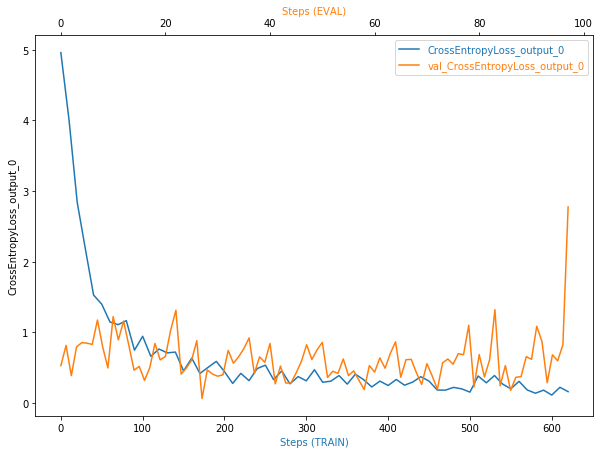

In [28]:
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  

**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

The training loss curve decreases as the number of steps increases, which may be a good fit. However, the validation loss shows noisy movements around the training loss. This may indicate an unrepresentative validation dataset that does not provide enough information to evaluate the model's ability to generalize. This may occur if the validation dataset is too small as compared to the training dataset [5].

The spikes in the validation loss curve could be due to several reasons:

- A small batch size (The batch size is 64) [7]. A larger batch size may avoid this.

- The final batch in an epoch may be smaller than the batch size if the dataset is not divisible by the batch size. The number of training images is 6680 and the batch size is 64, 6680/64=104.4. A small batch size causes high variance. This may have been avoided by setting <code>drop_last=True</code> in the torch dataloader [8]. 

- Outliers in the dataset [8]. Removing outliers may avoid this.

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

If the validation loss decreases to a point and then starts increasing, it may indicate overfitting [5]. This may be solved by training for less time, regularization, weight initialization, dropout regularization and weight constraints [6].
 


In [29]:
#Checking System Utilization

#training_job_name= 'pytorch-training-2022-01-03-04-36-48-431'

from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-288619721928/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 1, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 1, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 1, }'}}
s3 path:s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/profiler-output


Profiler data from system is available


In [31]:
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)

[2022-01-03 05:03:31.534 datascience-1-0-ml-g4dn-xlarge-94fad2f4401e538ca1255dfa1e84:19 INFO metrics_reader_base.py:134] Getting 14 event files
select events:['total']
select dimensions:['CPU', 'GPU']
filtered_events:{'total'}
filtered_dimensions:{'GPUUtilization-nodeid:algo-1', 'CPUUtilization-nodeid:algo-1', 'GPUMemoryUtilization-nodeid:algo-1'}


In [ ]:
# TODO: Display the profiler output

In [32]:
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
#rule_output_path='s3://sagemaker-us-east-1-288619721928/pytorch-training-2021-12-12-22-26-02-441/rule-output'
print(f"You will find the profiler report in {rule_output_path}")

You will find the profiler report in s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/rule-output


In [33]:
! aws s3 ls {rule_output_path} --recursive

2022-01-03 04:52:52     371723 pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-report.html
2022-01-03 04:52:51     220327 pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2022-01-03 04:52:45        192 pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2022-01-03 04:52:45      34247 pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2022-01-03 04:52:45        126 pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2022-01-03 04:52:45        328 pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2022-01-03 04:52:45       3609 pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-re

In [34]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json to ProfilerReport/profiler-output/profiler-reports/BatchSize.json
download: s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json to ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
download: s3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/rule-output/ProfilerReport/profiler-output/profiler-reports/MaxInitializationTime.json to ProfilerReport/profiler-output/profiler-reports/MaxInitializationTime.json
download: s3://sagemaker-us-east

In [40]:
import os

# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]


In [41]:
profiler_report_name

'ProfilerReport'

In [42]:
import IPython

IPython.display.HTML(filename=profiler_report_name + "/profiler-output/profiler-report.html")

## Model Deploying

In [ ]:
#Lost values, due to kernel loss. Used lesson5, project4, inference script method to deploy and invoke model. The infernce2.py script was adapted as needed. 

In [43]:
model_location=estimator.model_data

In [44]:
model_location

's3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/output/model.tar.gz'

In [8]:
model_location = 's3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/output/model.tar.gz'

In [9]:
model_location

's3://sagemaker-us-east-1-288619721928/pytorch-training-2022-01-03-04-36-48-431/output/model.tar.gz'

In [11]:
import sagemaker
import boto3
from sagemaker.tuner import CategoricalParameter, ContinuousParameter, HyperparameterTuner
from sagemaker.pytorch import PyTorch
from sagemaker import get_execution_role
from sagemaker.debugger import Rule, DebuggerHookConfig, TensorBoardOutputConfig, CollectionConfig, ProfilerRule, rule_configs
from sagemaker.debugger import ProfilerConfig, FrameworkProfile

from sagemaker.pytorch import PyTorchModel
from sagemaker.predictor import Predictor


In [12]:
jpeg_serializer = sagemaker.serializers.IdentitySerializer("image/jpeg")
json_deserializer = sagemaker.deserializers.JSONDeserializer()


class ImagePredictor(Predictor):
    def __init__(self, endpoint_name, sagemaker_session):
        super(ImagePredictor, self).__init__(
            endpoint_name,
            sagemaker_session=sagemaker_session,
            serializer=jpeg_serializer,
            deserializer=json_deserializer,
        )

In [13]:
pytorch_model = PyTorchModel(model_data=model_location, role=role, entry_point='infernce2.py',py_version='py3',
                             framework_version='1.4',
                             predictor_cls=ImagePredictor)

In [14]:
predictor = pytorch_model.deploy(initial_instance_count=1, instance_type='ml.g4dn.xlarge')


----------!

## Invoking the endpoint

In [15]:
!pip install pillow

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [16]:
!pip install torchvision

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 23.3 MB 23.7 MB/s            


In [19]:
import PIL

In [20]:
# https://github.com/aws/amazon-sagemaker-examples/blob/master/advanced_functionality/fastai_oxford_pets/fastai_lesson1_sagemaker_example.ipynb

urls = {
    "English Cocker Spaniel": "https://s3.amazonaws.com/cdn-origin-etr.akc.org/wp-content/uploads/2017/11/16105011/English-Cocker-Spaniel-Slide03.jpg",
    "Shiba Inu": "https://upload.wikimedia.org/wikipedia/commons/thumb/6/6b/Taka_Shiba.jpg/1200px-Taka_Shiba.jpg",
    "German Shorthaired": "https://vetstreet.brightspotcdn.com/dims4/default/232fcc6/2147483647/crop/0x0%2B0%2B0/resize/645x380/quality/90/?url=https%3A%2F%2Fvetstreet-brightspot.s3.amazonaws.com%2Fda%2Fa44590a0d211e0a2380050568d634f%2Ffile%2FGerman-Shorthair-Pointer-2-645mk062111.jpg", 
    "Maltese": "https://www.loveyourdog.com/wp-content/uploads/2021/04/Maltese-900x500.jpg",
    "Akita":"https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F05%2F27%2Fakita-tongue-white-257946779-2000.jpg",
    "Cavalier King Charles Spaniel":"https://www.loveyourdog.com/wp-content/uploads/2020/07/Red-Coated-Cavalier-King-Charles-Spaniel-Dog-900x500.jpg",
    "Chihuahua": "https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fstatic.onecms.io%2Fwp-content%2Fuploads%2Fsites%2F47%2F2021%2F03%2F09%2Fchihuahua-laying-down-wooden-floor-1675701502-2000.jpg"
}

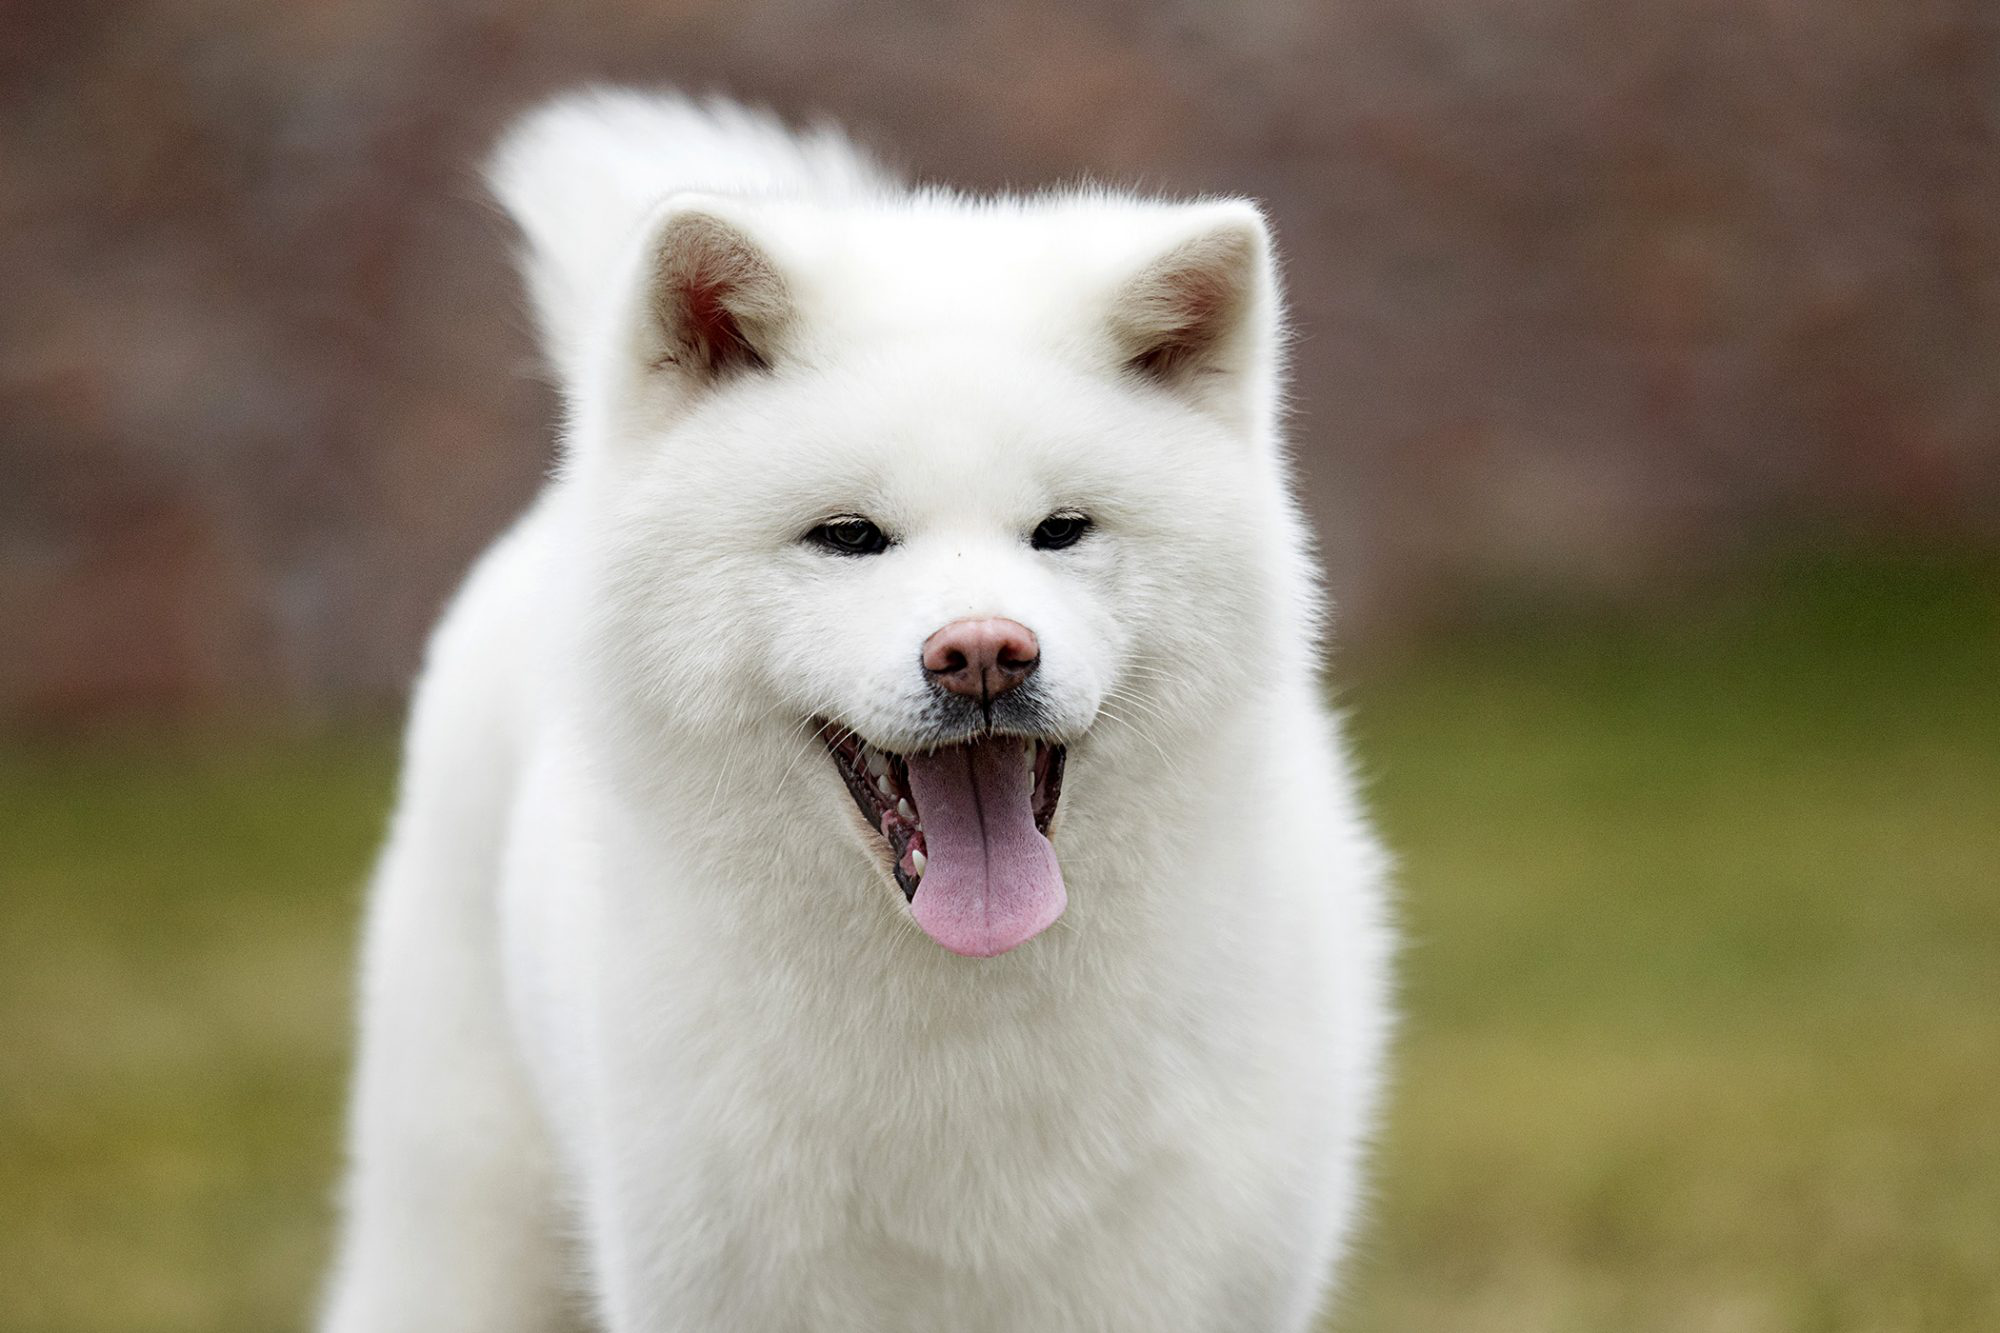

In [21]:
from PIL import Image
import requests
import random
import io

# get a random selection
random_pet = random.choice(list(urls))
random_pet_url = urls[random_pet]
img_bytes = requests.get(random_pet_url).content
img = PIL.Image.open(io.BytesIO(img_bytes))
display(img)

In [22]:
type(img_bytes)

bytes

In [23]:
random_pet

'Akita'

In [25]:
response=predictor.predict(img_bytes, initial_args={"ContentType": "image/jpeg"})

In [26]:
response

[[-10.535120010375977,
  -8.493334770202637,
  -12.669404983520508,
  0.7579018473625183,
  -6.1236701011657715,
  1.5866578817367554,
  -11.690390586853027,
  -10.089279174804688,
  -12.979802131652832,
  -10.038155555725098,
  -7.7120490074157715,
  -5.728911399841309,
  -6.360517501831055,
  -8.920722007751465,
  -9.167501449584961,
  -13.006659507751465,
  -10.571228981018066,
  -7.696442604064941,
  -7.244192600250244,
  -9.848176002502441,
  -4.188241004943848,
  -6.433498859405518,
  -12.59665584564209,
  -3.5090677738189697,
  -12.88137435913086,
  -12.029963493347168,
  -11.732439041137695,
  -12.66285514831543,
  -7.713768005371094,
  -12.335061073303223,
  -6.825982093811035,
  -13.747082710266113,
  -9.628111839294434,
  -10.348215103149414,
  -14.125393867492676,
  -12.007222175598145,
  -10.27331829071045,
  -12.001519203186035,
  -7.598188877105713,
  -10.242581367492676,
  -12.169224739074707,
  -8.714001655578613,
  -2.6144371032714844,
  -6.3245673179626465,
  -7.4806

In [27]:
import torch
import numpy as np
index = np.argmax(response, 1)
index

array([5])

In [ ]:
#006.American_eskimo_dog

In [28]:
dog = '006.American_eskimo_dog' #manually lookup
print("Predicted index: {} = {} \nActual: {}".format(index, dog, random_pet))

Predicted index: [5] = 006.American_eskimo_dog 
Actual: Akita


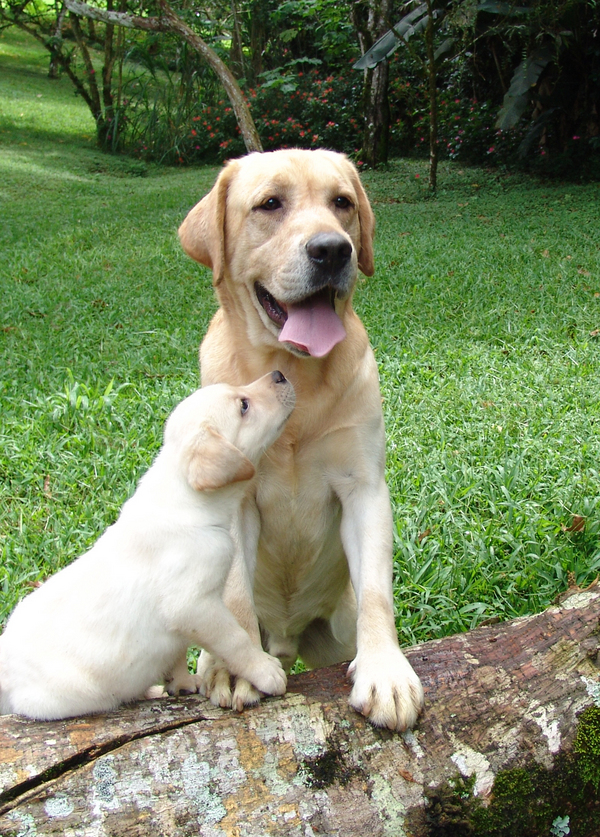

In [31]:
# TODO: Your code to load and preprocess image to send to endpoint for prediction

from PIL import Image

img_name = "Labrador_retriever_06470.jpg"   #from test folder in dog breed dataset
img = Image.open(img_name)
display(img)

In [32]:
#https://docs.aws.amazon.com/sagemaker/latest/dg/neo-requests-sdk.html

payload = None
with open(img_name, 'rb') as f:
    payload = f.read()

In [33]:
type(payload)

bytes

In [34]:
# TODO: Run an prediction on the endpoint
response1 = predictor.predict(data=payload, initial_args={"ContentType": "image/jpeg"})
print(response1)

[[-12.374049186706543, -8.643458366394043, -9.944364547729492, -6.500464916229248, -11.450032234191895, -12.523249626159668, -5.387452602386475, -9.689279556274414, -10.783197402954102, -3.8356337547302246, -8.842742919921875, -7.979033470153809, -10.375993728637695, -10.899408340454102, -7.2402777671813965, -4.49572229385376, -11.444602966308594, -8.86634635925293, -9.783103942871094, -9.45546817779541, -14.638294219970703, -13.010619163513184, -10.597799301147461, -11.155638694763184, -8.367298126220703, -11.258227348327637, -7.41339635848999, -7.015130043029785, -11.368754386901855, -9.280099868774414, -9.926165580749512, -12.279447555541992, -15.664060592651367, -11.556122779846191, -8.632940292358398, -11.874592781066895, -6.368990421295166, -10.016375541687012, -6.833511829376221, -6.768624782562256, -5.741695404052734, -10.137835502624512, -6.211112976074219, -7.096541881561279, -11.762904167175293, -11.001663208007812, -3.9824817180633545, -8.059710502624512, -10.95757484436035

In [35]:
import torch
import numpy as np
index1 = np.argmax(response1, 1)
index1

array([95])

In [ ]:
#096.Labrador_retriever

In [36]:
dog1 = '096.Labrador_retriever' #manually lookup
actual1 = 'Labrador'
print("Predicted index: {} = {} \nActual: {}".format(index1, dog1, actual1))

Predicted index: [95] = 096.Labrador_retriever 
Actual: Labrador


In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done

predictor.delete_endpoint()

#Deleted endpoints in AWS SageMaker

## References

[1] https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip , Accessed 15/12/21.

[2] He, K., Zhang, X., Ren, S. and Sun, J., 2016. Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).

[3] https://learnopencv.com/pytorch-for-beginners-image-classification-using-pre-trained-models/ , Accessed 15/12/21.

[4] https://classroom.udacity.com/nanodegrees/nd189/parts/cd0387/modules/d0966867-c32b-4e96-ace8-99590700f02c/lessons/cc48aa55-2ef2-4cd1-8475-fec07e814d1a/concepts/2a147a62-97cf-4c0a-b998-d2916359297f , Accessed 15/12/21.
 
[5] https://machinelearningmastery.com/learning-curves-for-diagnosing-machine-learning-model-performance/ , Accessed 15/12/21.

[6] https://github.com/aws/amazon-sagemaker-examples/blob/master/sagemaker-debugger/pytorch_model_debugging/pytorch_script_change_smdebug.ipynb , Accessed 15/12/21.

[7] https://stackoverflow.com/questions/68529287/why-does-my-learning-curves-shows-spikes-or-fluctuations , Accessed 10/1/22.

[8] https://stats.stackexchange.com/questions/303857/explanation-of-spikes-in-training-loss-vs-iterations-with-adam-optimizer ,  Accessed 10/1/22.
